# Prediction model for diabetes dataset

This notebook assumes the use of the cleaned dataset (notebook EDA.ipynb).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


In [2]:
# Load dataset
data = pd.read_csv('../datasets/diabetes_cleaned.csv')


In [3]:
# Define target and features
target_feature = 'CLASS'
X = data.drop(columns=[target_feature])
y = data[target_feature]


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print information regarding the splitted data
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
# Print the distribution of the target variable in the training set
print("\nDistribution of target variable in training set:")
print(y_train.value_counts(normalize=True))
# Print the distribution of the target variable in the testing set
print("\nDistribution of target variable in testing set:")
print(y_test.value_counts(normalize=True))

Training set size: 779
Testing set size: 195

Distribution of target variable in training set:
CLASS
1    0.894737
0    0.105263
Name: proportion, dtype: float64

Distribution of target variable in testing set:
CLASS
1    0.897436
0    0.102564
Name: proportion, dtype: float64


In [5]:
X_test

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
137,1,50.0,5.7,53.0,6.0,5.4,1.7,1.4,3.3,0.700000,25.0
837,1,42.0,2.3,52.0,7.0,5.2,2.8,3.1,1.3,0.900000,24.0
86,1,40.0,5.8,123.0,4.5,4.6,1.5,0.7,3.0,0.600000,24.0
395,0,60.0,6.2,87.0,4.8,4.8,1.6,0.8,1.2,0.500000,35.0
494,0,52.0,5.4,56.0,7.9,4.9,2.1,1.1,2.5,0.900000,28.0
...,...,...,...,...,...,...,...,...,...,...,...
655,0,59.0,5.2,56.0,10.9,4.9,2.1,1.1,2.5,0.900000,28.0
574,0,54.0,6.8,73.0,7.5,5.1,2.0,1.3,1.4,1.500000,39.0
182,0,38.0,4.0,67.0,10.2,5.2,2.0,1.1,3.2,0.905094,47.0
955,1,54.0,5.0,88.0,6.8,5.1,2.1,1.1,3.0,1.000000,30.0


In [6]:
y_test

137    1
837    1
86     0
395    1
494    1
      ..
655    1
574    1
182    1
955    1
896    1
Name: CLASS, Length: 195, dtype: int64

In [7]:
# Class balancing 

# Temp merge of X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)

# 2 class division
class_0 = train_df[train_df['CLASS'] == 0]
class_1 = train_df[train_df['CLASS'] == 1]

# Undersampling of class = '1' 
class_1_under = class_1.sample(n=len(class_0), random_state=42)

# Recombine the classes
train_balanced = pd.concat([class_0, class_1_under])

# Shuffle
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separation of features and target
X_train_bal = train_balanced.drop(columns=['CLASS'])
y_train_bal = train_balanced['CLASS']

In [8]:
# print information regarding the splitted data after balancing
print("\nAfter balancing:")
print(f"Training set size: {X_train_bal.shape[0]}")
# Print the distribution of the target variable in the training set
print("\nDistribution of target variable in training set:")
print(y_train_bal.value_counts(normalize=True))



After balancing:
Training set size: 164

Distribution of target variable in training set:
CLASS
1    0.5
0    0.5
Name: proportion, dtype: float64


#### Summary of datasets after splitting and balancing 
- **X_train_bal**: Features of the training set after balancing  
- **y_train_bal**: Target variable of the training set after balancing  
- **X_test**: Features of the testing set  
- **y_test**: Target variable of the testing set


#### Classification algorithm to be compared:
- **Logistic Regression**: best for binary classification
- **Decision Tree**: good for interpretability and non-linear relationships
- **K-Nearest Neighbors**: good for non-linear relationships and local patterns
- **Random Forest**: good for handling large datasets and feature importance


In [9]:
# Models 

# random_state = 95 is set for reproducibility of results.

# Unbalanced:
log_reg = LogisticRegression(max_iter=1000, random_state=95) 
decision_tree = DecisionTreeClassifier(random_state=95)
knn = KNeighborsClassifier()
rnd_forest = RandomForestClassifier(random_state=95)

# balanced:
bal_log_reg = LogisticRegression(max_iter=1000, random_state=95) 
bal_decision_tree = DecisionTreeClassifier(random_state=95)
bal_knn = KNeighborsClassifier()
bal_rnd_forest = RandomForestClassifier(random_state=95)



In [10]:
# Training for unbalanced datasets:

# Logistic Regression
log_reg.fit(X_train, y_train)

# Decision Tree
decision_tree.fit(X_train, y_train)

# K-Nearest Neighbors
knn.fit(X_train, y_train)

# Random Forest
rnd_forest.fit(X_train, y_train)




# Training for balanced datasets:

# Logistic Regression
bal_log_reg.fit(X_train_bal, y_train_bal)

# Decision Tree
bal_decision_tree.fit(X_train_bal, y_train_bal)

# K-Nearest Neighbors
bal_knn.fit(X_train_bal, y_train_bal)

# Random Forest
bal_rnd_forest.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=95)

In [11]:
# Testing for unbalanced datasets:

# Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
# Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)
# K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)
# Random Forest
y_pred_rnd_forest = rnd_forest.predict(X_test)

# Testing for balanced datasets:
# Logistic Regression
y_pred_bal_log_reg = bal_log_reg.predict(X_test)
# Decision Tree
y_pred_bal_decision_tree = bal_decision_tree.predict(X_test)
# K-Nearest Neighbors
y_pred_bal_knn = bal_knn.predict(X_test)
# Random Forest
y_pred_bal_rnd_forest = bal_rnd_forest.predict(X_test)


In [12]:
# Define the models and predictions
models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest']  # model names
ypred_bal = [y_pred_bal_log_reg, y_pred_bal_decision_tree, y_pred_bal_knn, y_pred_bal_rnd_forest]  # predictions for balanced datasets
ypred = [y_pred_log_reg, y_pred_decision_tree, y_pred_knn, y_pred_rnd_forest]  # predictions for unbalanced datasets

# Calculate metrics for balanced datasets
balanced_accuracy = []
balanced_precision = []
balanced_f1 = []
balanced_recall_0 = []
balanced_recall_1 = []

for y_pred in ypred_bal:
    balanced_accuracy.append(accuracy_score(y_test, y_pred))
    balanced_precision.append(precision_score(y_test, y_pred))
    balanced_f1.append(f1_score(y_test, y_pred))
    balanced_recall_0.append(recall_score(y_test, y_pred, pos_label=0))
    balanced_recall_1.append(recall_score(y_test, y_pred, pos_label=1))

# Create dataframe for balanced metrics
balanced_metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': balanced_accuracy,
    'Precision': balanced_precision,
    'F1-Score': balanced_f1,
    'Recall (0)': balanced_recall_0,
    'Recall (1)': balanced_recall_1
})

# Calculate metrics for unbalanced datasets
unbalanced_accuracy = []
unbalanced_precision = []
unbalanced_f1 = []
unbalanced_recall_0 = []
unbalanced_recall_1 = []

for y_pred in ypred:
    unbalanced_accuracy.append(accuracy_score(y_test, y_pred))
    unbalanced_precision.append(precision_score(y_test, y_pred))
    unbalanced_f1.append(f1_score(y_test, y_pred))
    unbalanced_recall_0.append(recall_score(y_test, y_pred, pos_label=0))
    unbalanced_recall_1.append(recall_score(y_test, y_pred, pos_label=1))

# Create dataframe for unbalanced metrics
unbalanced_metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': unbalanced_accuracy,
    'Precision': unbalanced_precision,
    'F1-Score': unbalanced_f1,
    'Recall (0)': unbalanced_recall_0,
    'Recall (1)': unbalanced_recall_1
})

# Display the dataframes
print("Balanced Metrics:")
print(balanced_metrics_df)
print("_______________________\n")
print("\nUnbalanced Metrics:")
print(unbalanced_metrics_df)
print("_______________________\n")


Balanced Metrics:
                 Model  Accuracy  Precision  F1-Score  Recall (0)  Recall (1)
0  Logistic Regression  0.969231   1.000000  0.982558        1.00    0.965714
1        Decision Tree  0.979487   0.994220  0.988506        0.95    0.982857
2  K-Nearest Neighbors  0.856410   0.993289  0.913580        0.95    0.845714
3        Random Forest  0.989744   1.000000  0.994253        1.00    0.988571
_______________________


Unbalanced Metrics:
                 Model  Accuracy  Precision  F1-Score  Recall (0)  Recall (1)
0  Logistic Regression  0.958974   0.971751  0.977273        0.75    0.982857
1        Decision Tree  0.994872   0.994318  0.997151        0.95    1.000000
2  K-Nearest Neighbors  0.923077   0.934783  0.958217        0.40    0.982857
3        Random Forest  0.994872   0.994318  0.997151        0.95    1.000000
_______________________



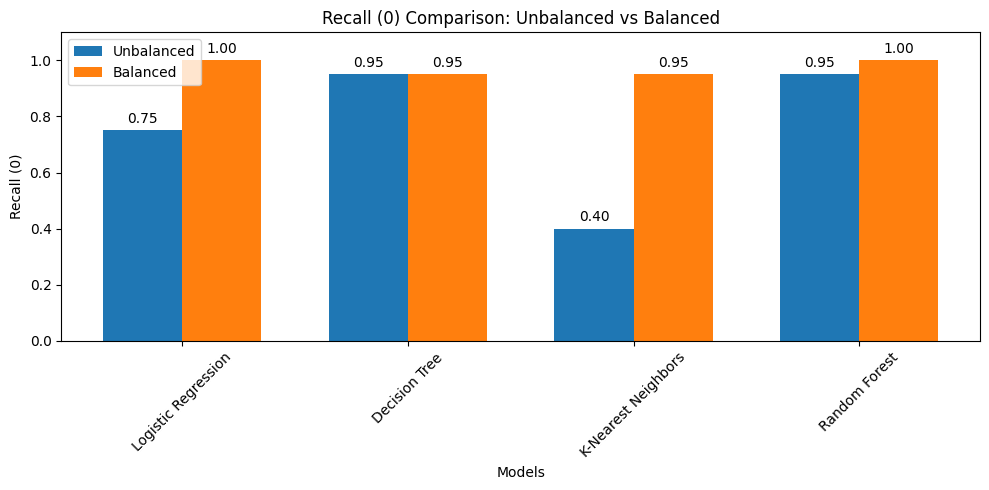

In [13]:
# The CLASS=0 (non-diabetic) is the underrepresented class (i.e., there are significantly fewer data entries for CLASS=0 compared to CLASS=1).
# After balancing the models the results seem to be almost the same (F1-Score and Accuracy) but the Recall (0) is significantly improved.
    # Recall quick remark: 
    # Recall (j) = True Positive / (True Positive + False Negative)
    # For a target class 'j' measures the ability of the model to correctly identify all instances of class 'j'.
    # In simple terms, it is the proportion of actual positives (class 'j') that are correctly predicted by the model.

# Extract recall (0) values for balanced and unbalanced datasets
recall_0_unbalanced = unbalanced_metrics_df['Recall (0)']
recall_0_balanced = balanced_metrics_df['Recall (0)']


# Plot Recall (0) for unbalanced vs balanced datasets
x = np.arange(len(models))  # the label locations
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars for unbalanced and balanced recall (0)
bars1 = ax.bar(x - bar_width / 2, recall_0_unbalanced, bar_width, label='Unbalanced')
bars2 = ax.bar(x + bar_width / 2, recall_0_balanced, bar_width, label='Balanced')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Recall (0)')
ax.set_title('Recall (0) Comparison: Unbalanced vs Balanced')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')


ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()


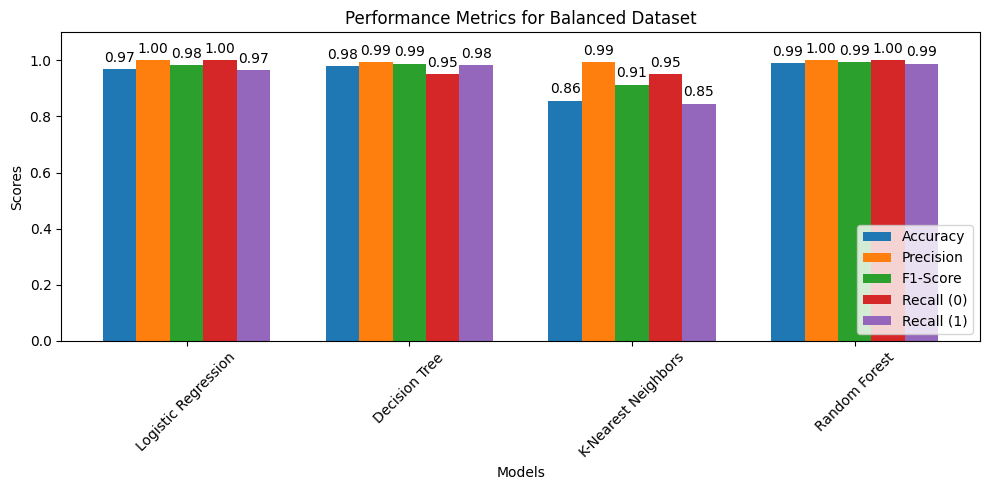

In [14]:
# Plot the performance metrics for the balanced dataset
metrics = ['Accuracy', 'Precision', 'F1-Score', 'Recall (0)', 'Recall (1)']
x = np.arange(len(models))  # the label locations
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, balanced_metrics_df[metric], bar_width, label=metric)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Balanced Dataset')
ax.set_xticks(x + (len(metrics) - 1) * bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend(loc='lower right')

# Annotate bars with values
for i, metric in enumerate(metrics):
    for j, value in enumerate(balanced_metrics_df[metric]):
        ax.annotate(f'{value:.2f}', xy=(j + i * bar_width, value),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
# Adjust the y-axis limit to leave some space above 1
ax.set_ylim(0, 1.1)

plt.show()

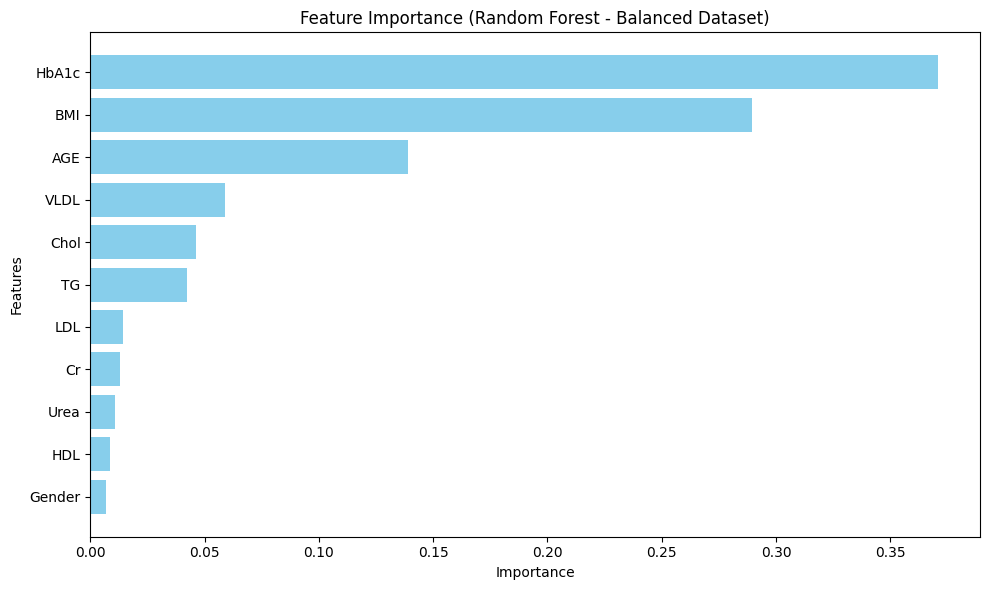

In [15]:
# we will go on with only the balanced dataset since performance are improved

# Plot feature importance for Random Forest (balanced dataset)
feature_importances = bal_rnd_forest.feature_importances_
features = X_train_bal.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest - Balanced Dataset)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()


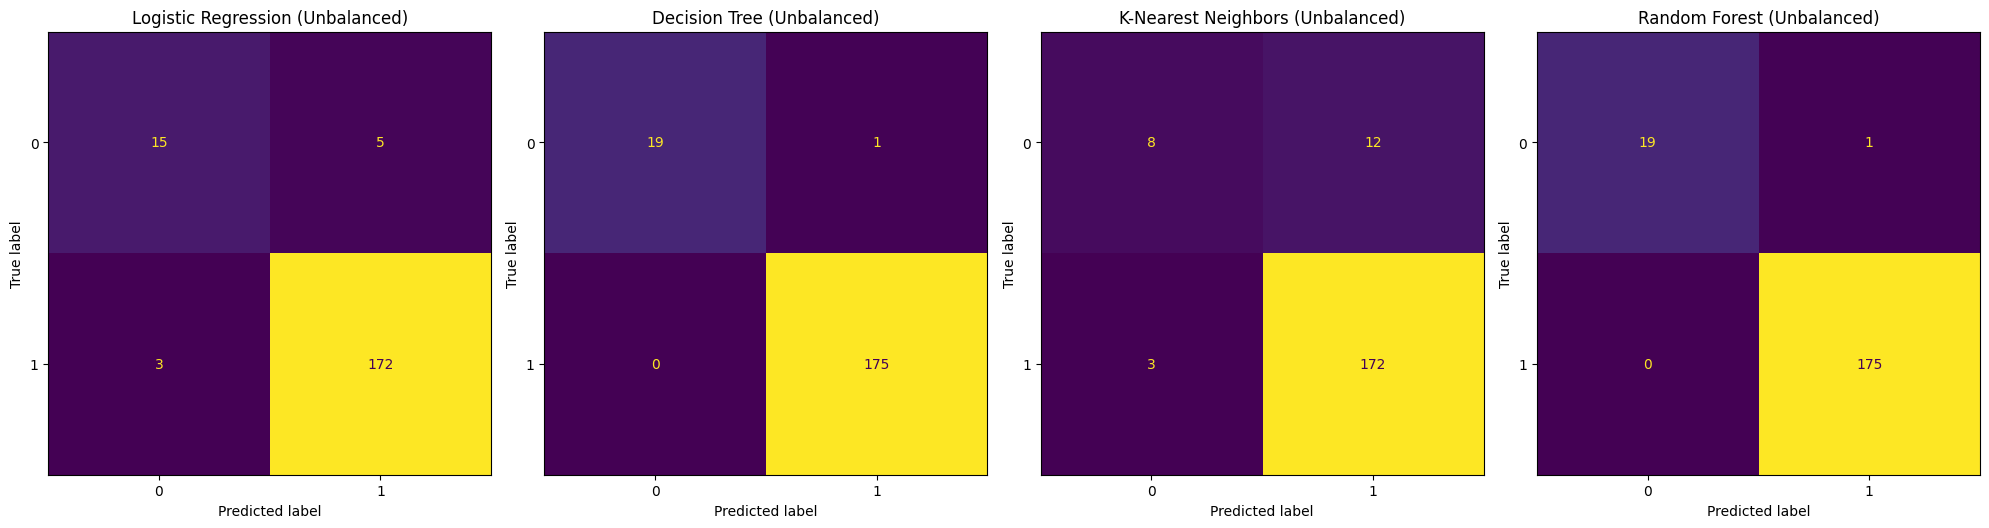

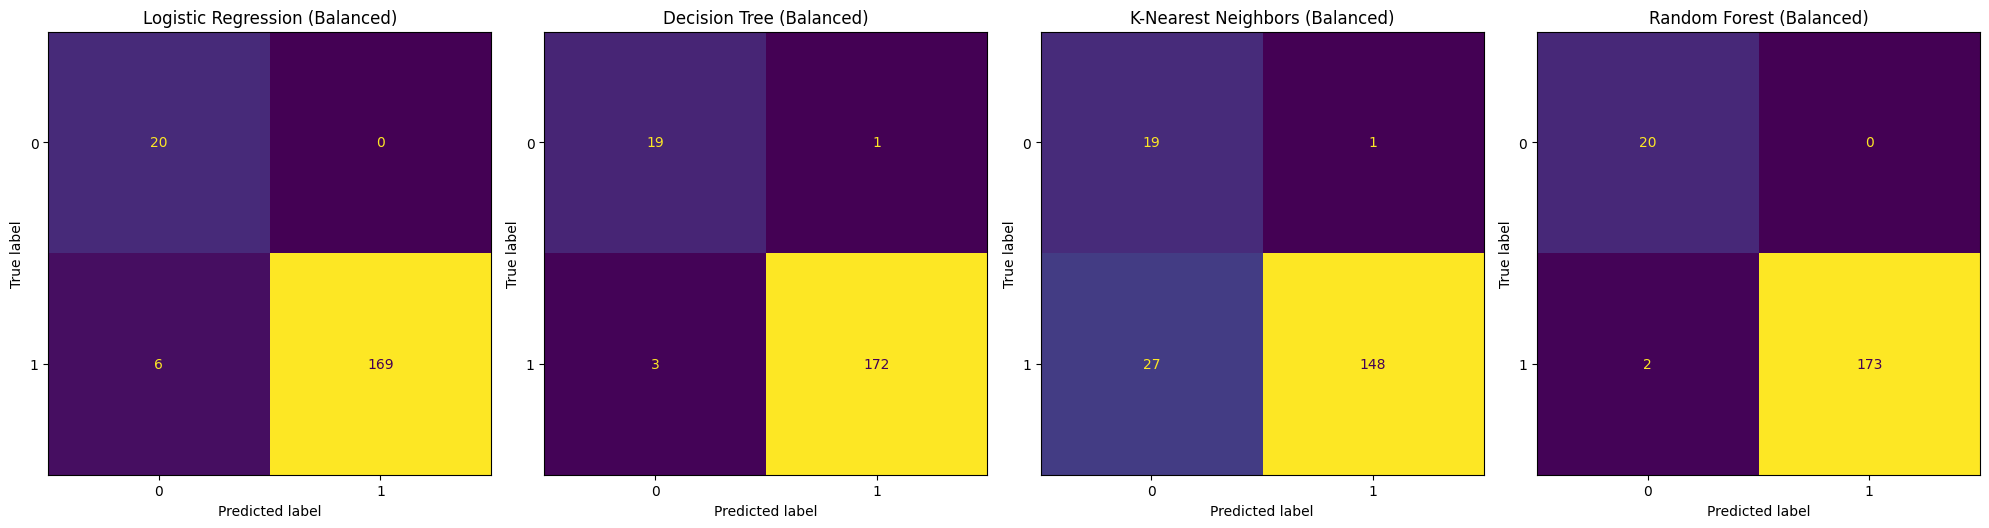

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create subplots for unbalanced datasets
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for ax, model, y_pred_unbal in zip(axes, models, ypred):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_unbal, ax=ax, colorbar=False)
    ax.set_title(f"{model} (Unbalanced)")

plt.tight_layout()
plt.show()

# Create subplots for balanced datasets
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for ax, model, y_pred_bal in zip(axes, models, ypred_bal):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bal, ax=ax, colorbar=False)
    ax.set_title(f"{model} (Balanced)")

plt.tight_layout()
plt.show()
